## 1. Import data
Akan digunakan Data **Mall Customer Segmentation** yang berasal dari kaggle.com. Dataset ini berisi data pelanggan di mall dengan fitur seperti usia, pendapatan tahunan, dan skor pengeluaran

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv('Mall_Customers.csv') 

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2. Standarisasi
Kita akan menggunakan kolom seperti Age, Annual Income (k$), dan Spending Score (1-100) sebagai fitur untuk clustering. Pertama-tama kita perlu menstandarisasi data agar K-Means dapat bekerja dengan baik.

In [6]:
# Memilih fitur yang relevan untuk clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
# Menstandarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled[0:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

## 3. Clustering

In [10]:
cluster_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average').fit(X_scaled)  
cluster_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete').fit(X_scaled)  
cluster_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single').fit(X_scaled)  
cluster_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward').fit(X_scaled)

In [11]:
df['labels_average'] = pd.DataFrame(cluster_average.labels_)[0]
df['labels_complete'] = pd.DataFrame(cluster_complete.labels_)[0]
df['labels_single'] = pd.DataFrame(cluster_single.labels_)[0]
df['labels_ward'] = pd.DataFrame(cluster_ward.labels_)[0]

# Dendogram

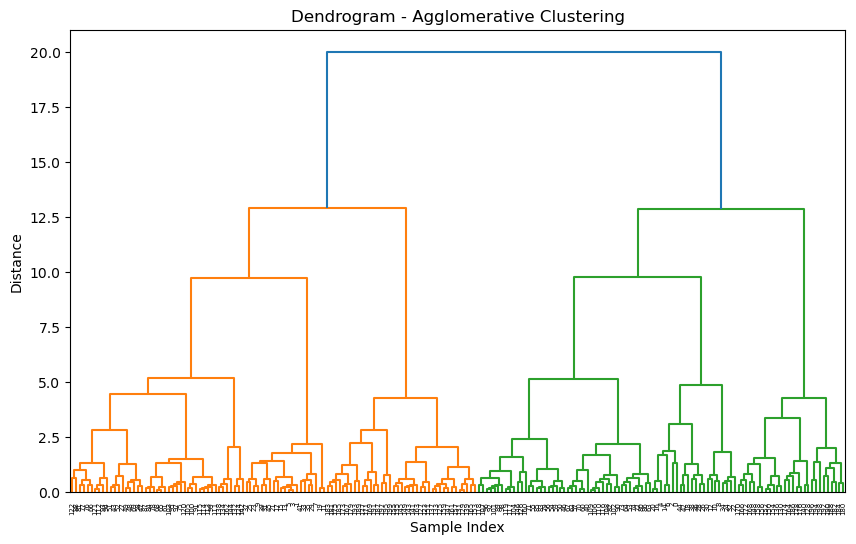

In [13]:
# Buat linkage matrix
# metode bisa 'ward', 'complete', 'average', 'single'
linked = sch.linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [14]:
# Hitung linkage matrix
Z = sch.linkage(X_scaled, method='ward')

In [15]:
print("Linkage Matrix (nilai mentah):")
print(Z[:10])  # tampilkan 10 baris pertama

Linkage Matrix (nilai mentah):
[[6.50000000e+01 6.80000000e+01 7.17666897e-02 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 7.17666897e-02 2.00000000e+00]
 [1.06000000e+02 1.09000000e+02 7.76431214e-02 2.00000000e+00]
 [3.00000000e+00 5.00000000e+00 9.00803899e-02 2.00000000e+00]
 [9.20000000e+01 9.60000000e+01 1.05730374e-01 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 1.05730374e-01 2.00000000e+00]
 [1.33000000e+02 1.37000000e+02 1.12409152e-01 2.00000000e+00]
 [1.60000000e+01 2.00000000e+01 1.14508288e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 1.20910138e-01 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 1.30409100e-01 2.00000000e+00]]


Struktur Z (linkage matrix) berukuran (n_samples - 1) x 4:

- col 0 = indeks cluster pertama yang digabung
- col 1 = indeks cluster kedua yang digabung
- col 2 = jarak (distance) antar cluster
- col 3 = jumlah sampel dalam cluster hasil gabungan

# Visualize using PCA
Visualisasi data paling mudah menggunakan grafik 2 dimensi. Karena kita punya lebih dari 2 variabel, maka kita bisa gunakan PCA untuk menjadikannya menjadi 2 variabel baru.

In [18]:
pca = PCA(2)

arr_pca = pca.fit_transform(X)

In [19]:
df_pca = pd.DataFrame(arr_pca)
df_pca.columns = ['PC1','PC2']
df_pca['labels'] = df['labels_ward'] 

<Axes: xlabel='PC1', ylabel='PC2'>

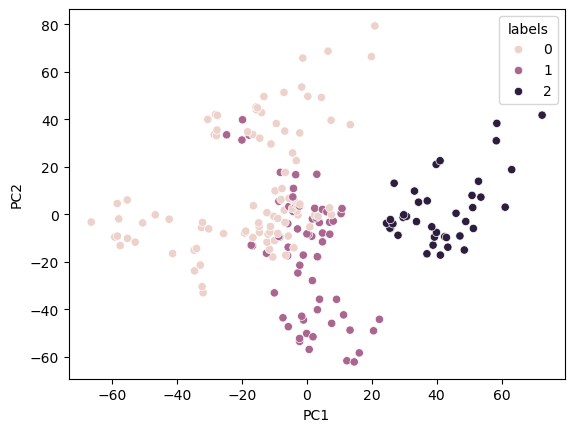

In [20]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="labels")

# Deskripsi Group
Kita butuh mengerti karakteristik dari cluster yang terbentuk dengan cara memberi nama group. Nama group ini bisa kita dapatkan dari statisika deskriptif nya

In [22]:
import pandas as pd

summary = df.groupby("labels_average").agg(
    Age_min=("Age", "min"),
    Age_mean=("Age", "mean"),
    Age_median=("Age", "median"),
    Age_max=("Age", "max"),
    
    Income_min=("Annual Income (k$)", "min"),
    Income_mean=("Annual Income (k$)", "mean"),
    Income_median=("Annual Income (k$)", "median"),
    Income_max=("Annual Income (k$)", "max"),
    
    Score_min=("Spending Score (1-100)", "min"),
    Score_mean=("Spending Score (1-100)", "mean"),
    Score_median=("Spending Score (1-100)", "median"),
    Score_max=("Spending Score (1-100)", "max"),
    
    Total_Male=("Gender", lambda x: (x == "Male").sum()),
    Total_Female=("Gender", lambda x: (x == "Female").sum())
).reset_index()

In [23]:
summary

,labels_average,Age_min,Age_mean,Age_median,Age_max,Income_min,Income_mean,Income_median,Income_max,Score_min,Score_mean,Score_median,Score_max,Total_Male,Total_Female
0,0,18,28.098901,29.0,40,15,61.626374,64.0,137,29,70.670330,73.0,99,38,53
1,1,19,50.729730,49.5,70,15,46.162162,48.5,69,3,40.594595,45.5,60,30,44
2,2,19,41.685714,43.0,59,71,88.228571,85.0,137,1,17.285714,16.0,39,20,15


Berdasarkan income_median dan income_mean,
- cluster 2 : tertinggi
- cluster 0 : menengah
- cluster 1 : terendah

Berdasarkan age_mean dan age_median
- cluster 1 : tertua 
- cluster 2 : menengah
- cluster 0 : termuda
  
Berdasarkan Score_mean dan Score_median
- cluster 0 : tertinggi (sering belanja)
- cluster 1 : menengah 
- cluster 2 : terendah (jarang belanja)

Kesimpulan
- cluster 0 : pemuda yang suka belanja dan income nya biasa saja
- cluster 1 : orang yang sudah tua yang income nya rendah dan frekuensi belanjanya biasa saja
- cluster 2 : orang dewasa yang punya banyak uang dan jarang belanja

# Reference
- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python 